In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt


# path = '../../CodePass2/runs/'
# path = "D:/"
# with h5py.File(path+'finale_normal.hdf5', 'r') as f:
#     # read the data
#     positions = f['x'][:]
#     properties = f['properties'][:][0]
#     p = f['p'][:]

positions = np.load("../f_poss.npy")
properties = np.load("../f_properties.npy")

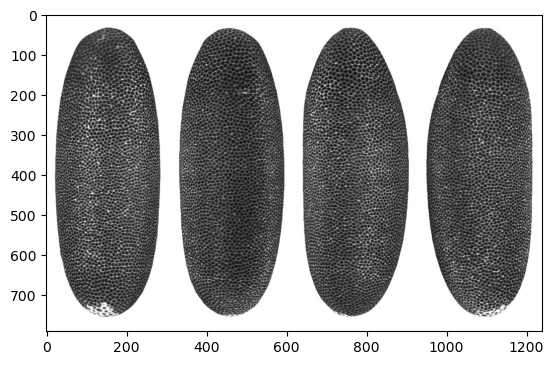

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
stas_vid_dir = "../../StasVideos/fourway.mp4"

def load_video(video_path):
    # load the video
    cap = cv2.VideoCapture(video_path)

    # save the frames
    frames = []
    III = 0
    while True:
        print(III, end = "\r")
        III += 1
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    # convert the frames to a numpy array
    frames = np.array(frames)
    plt.imshow(frames[0])
    plt.show()
    return frames


frames = load_video('fourway.mp4')

In [61]:
def plot_sim_img(i, ax):
    xx, yy, zz = positions[i, :, 0], positions[i, :, 1], positions[i, :, 2]

    print(xx.shape)
    print(np.max(xx), np.min(xx))
    facecol = (0.1,0.1,0.1,1)
    edgecol = (0.6,0.6,0.6,1)
    edgecol = (1., 1., 1.,0.6)
    # edgecol = "none"
    s = 6
    dist = 55
    # dorsal
    yyy, xxx = yy, -xx
    zsort = np.argsort(zz)
    ax.scatter(-yyy[zsort], xxx[zsort], edgecolors=edgecol, facecolors=facecol, s = s*(zz[zsort]+40)/8,  linewidth=0.5, )

    # ventral
    yyy, xxx = yy, -xx
    zsort = np.argsort(zz)[::-1]
    ax.scatter(-yyy[zsort] + dist, xxx[zsort], edgecolors=edgecol, facecolors=facecol, s = -s*(zz[zsort]-40)/8,  linewidth=0.5,)

    # side
    zzz, xxx = zz, -xx
    ysort = np.argsort(yy)
    ax.scatter(-zzz[ysort]+ 2*dist, xxx[ysort] , edgecolors=edgecol, facecolors=facecol, s = s*(yy+40)[ysort]/8,  linewidth=0.5,)

    # ax.set_xlim(-30, 140)
    # ax.set_ylim(-63, 80)

    ax.set_aspect('equal')
    

(5000,)
52.44888 -69.96184
(5000,)
51.056087 -69.94622
(5000,)
50.60475 -69.94661


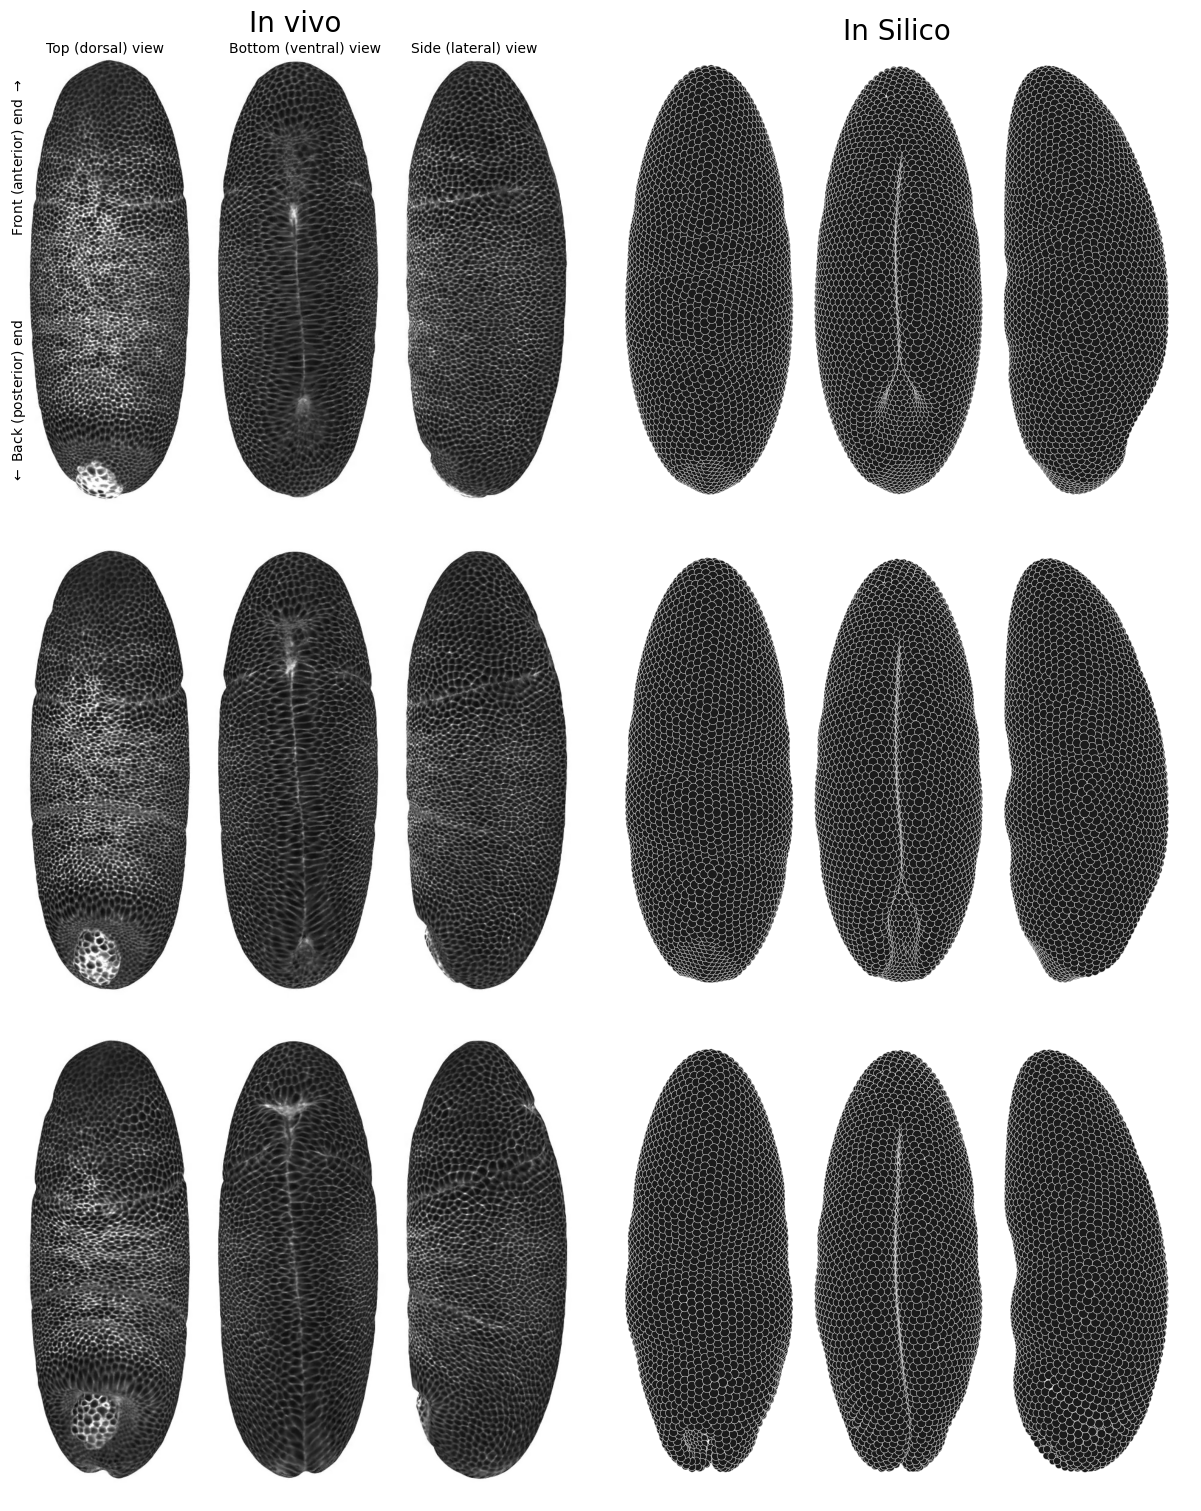

In [101]:
xsize = 12
ysize = 5
n_images = 3
fig, axs = plt.subplots(n_images, 2, figsize=(xsize, ysize*n_images), constrained_layout=True)

video_axs = axs[:, 0]
sim_axs = axs[:, 1]

offset = 6
sim_speed = 890
stas_speed = 14

for i in range(n_images):
    iii = i + offset
    video_axs[i].imshow(cv2.cvtColor(frames[iii*stas_speed][:,:920], cv2.COLOR_BGR2RGB))
    video_axs[i].axis('off')

    plot_sim_img((i+1)*sim_speed, sim_axs[i])
    sim_axs[i].axis('off')


video_axs[0].set_title("In vivo", fontsize = 20)
sim_axs[0].set_title("In Silico", fontsize = 20)

ty = 20
axs[0, 0].text(50,ty,"Top (dorsal) view")
axs[0, 0].text(350,ty,"Bottom (ventral) view")
axs[0, 0].text(650,ty,"Side (lateral) view")

#rotate 90 degrees
axs[0, 0].text(-10,720,"$\leftarrow$ Back (posterior) end                   Front (anterior) end $\\rightarrow$", rotation = 90)

# save as pdf
plt.savefig("comparison.pdf")

plt.show()

In [15]:
positions

array([[[ 0.39811546,  0.00606073, -1.3467042 ],
        [ 0.26174757, -0.02317516, -1.3928466 ],
        [-0.41047424, -0.29132202, -1.3814151 ],
        ...,
        [-0.04259914,  1.3693391 , -0.3390918 ],
        [-0.01464552, -0.7337966 ,  1.1391299 ],
        [-0.2603386 ,  1.3700055 , -0.21862948]],

       [[ 0.46232373, -0.06182334, -1.3439206 ],
        [ 0.25724027, -0.0397057 , -1.4186066 ],
        [-0.39434147, -0.31786948, -1.4065974 ],
        ...,
        [-0.03538636,  1.2912419 , -0.316382  ],
        [-0.02734063, -0.69495535,  1.0763276 ],
        [-0.3381216 ,  1.2696872 , -0.18148652]],

       [[ 0.46548408, -0.07881845, -1.3419027 ],
        [ 0.2518415 , -0.05051251, -1.4193063 ],
        [-0.39042848, -0.3332354 , -1.4030762 ],
        ...,
        [-0.04521296,  1.2910839 , -0.31534004],
        [-0.02217113, -0.6975498 ,  1.0747142 ],
        [-0.35168466,  1.2646208 , -0.18129934]],

       ...,

       [[ 0.04375418, -0.58250546, -1.28926   ],
        [ 0